In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("house_train.csv")
test= pd.read_csv("house_test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
type(train.isnull().sum(axis=0))

pandas.core.series.Series

In [6]:
for i,k in train.isnull().sum(axis=0).iteritems():
    if k>100:
        train.drop(columns=[i],inplace=True)
        test.drop(columns=[i],inplace=True)

In [7]:
train.isnull().sum(axis=0)

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
train['EnclosedPorch'].value_counts().sort_values().iloc[-1:0:-1]

0      1252
112      15
96        6
192       5
144       5
       ... 
37        1
210       1
291       1
552       1
30        1
Name: EnclosedPorch, Length: 119, dtype: int64

In [10]:
x_train=train.drop(columns=['SalePrice'])
y_train=train['SalePrice']

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca= PCA()

<AxesSubplot:>

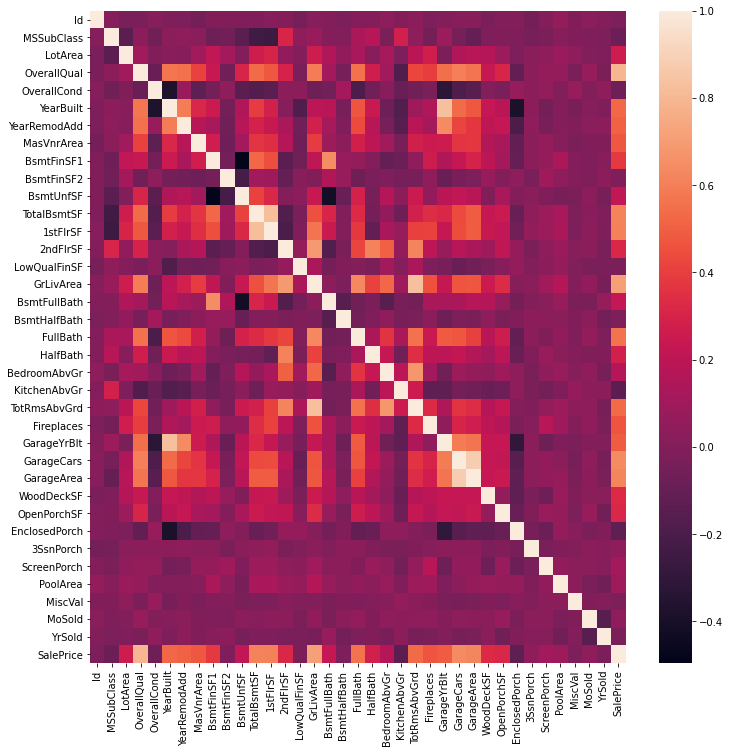

In [13]:
num= train.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(12,12))
sns.heatmap(num.corr())

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [158]:
num_pip= Pipeline(steps=[
    ("impute_n",SimpleImputer(strategy='mean')),
    ("scale",MinMaxScaler())
])

In [162]:
cat_pip= Pipeline(steps=[
    ("impute_c",SimpleImputer(strategy="most_frequent")),
    ("encode",OneHotEncoder())
    
])

In [160]:
column_tr= ColumnTransformer(transformers=[
    ("numeric",num_pip,x_train.select_dtypes(include=["int64","float64"]).columns),
    ("category",cat_pip,x_train.select_dtypes(include=["object"]).columns)
])

In [161]:
pre_model=Pipeline(steps=[
    ("prep",column_tr),
    ("outlier",IsolationForest(n_estimators=130))
])

In [105]:
pre_model.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_n',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFu...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'Garag

In [116]:
arr=pre_model.predict(x_train)
arr=np.where(arr==-1,False,True)

In [122]:
x_train=x_train[arr]
y_train=y_train[arr]

In [225]:
num_pip_main= Pipeline(steps=[
    ("imputen",SimpleImputer()),
    ("scale",MinMaxScaler())
])

cat_pip_main= Pipeline(steps=[
    ("imputec",SimpleImputer()),
    ("encode",OneHotEncoder())
    
])

column_tr_main= ColumnTransformer(transformers=[
    ("numeric",num_pip_main,x_train.select_dtypes(include=["int64","float64"]).columns),
    ("category",cat_pip_main,x_train.select_dtypes(include=["object",'O']).columns)
])

In [226]:
x_train.select_dtypes(include=["int64","float64"]).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [227]:
model=Pipeline(steps=[
    ("column",column_tr_main),
    ("model",DecisionTreeRegressor())
])

In [219]:
from sklearn.model_selection import GridSearchCV

In [257]:
model_params={
    'column__numeric__imputen__strategy':['mean','median'],
    'column__category__imputec__strategy':['most_frequent'],
}

In [258]:
model_grid=GridSearchCV(model,model_params,cv=5)

In [264]:
model_grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__column', 'estimator__model', 'estimator__column__n_jobs', 'estimator__column__remainder', 'estimator__column__sparse_threshold', 'estimator__column__transformer_weights', 'estimator__column__transformers', 'estimator__column__verbose', 'estimator__column__numeric', 'estimator__column__category', 'estimator__column__numeric__memory', 'estimator__column__numeric__steps', 'estimator__column__numeric__verbose', 'estimator__column__numeric__imputen', 'estimator__column__numeric__scale', 'estimator__column__numeric__imputen__add_indicator', 'estimator__column__numeric__imputen__copy', 'estimator__column__numeric__imputen__fill_value', 'estimator__column__numeric__imputen__missing_values', 'estimator__column__numeric__imputen__strategy', 'estimator__column__numeric__imputen__verbose', 'estimator__column__numeric__scale__clip', 'estimator__column__numeric__scale__copy', 'estimator__column

In [ ]:
model_grid.fit(x_train,y_train)

In [261]:
main_model_end=model_grid.best_estimator_

In [263]:
main_model_end.predict(x_test)

array([119000.,  98000., 319900., ...,  91000., 155000., 125500.])

In [126]:
from sklearn.metrics import mean_squared_error

0.0

<AxesSubplot:>

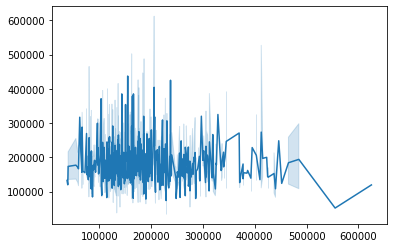

In [271]:
display(mean_squared_error(y_train,main_model_end.predict(x_train)))
sns.lineplot(x=main_model_end.predict(test)[0:len(x_train)],y=main_model_end.predict(x_train),ci=98)

In [303]:
pred= pd.DataFrame(main_model_end.predict(test),columns=['SalePrice'])

In [305]:
prediction= pd.merge(test['Id'],pred,how='left',left_index=True,right_index=True)

In [306]:
prediction.to_csv("House_price_prediction_new.csv",index=False)